In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load and pre-process the data
data = pd.read_csv('TATAMOTORS.NS.csv')

In [3]:
# Drop any rows with NaN values
data.dropna(inplace=True)

In [4]:
# Drop irrelevant columns
X = data.drop(['Adj Close', 'Date'], axis=1)

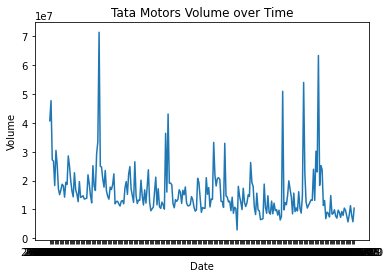

In [5]:
# Plot the Volume over time
plt.plot(data['Date'], data['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Tata Motors Volume over Time')
plt.show()

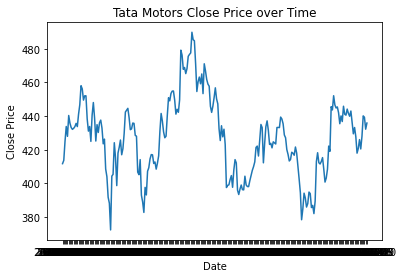

In [6]:
# Plot the Close price over time
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Tata Motors Close Price over Time')
plt.show()

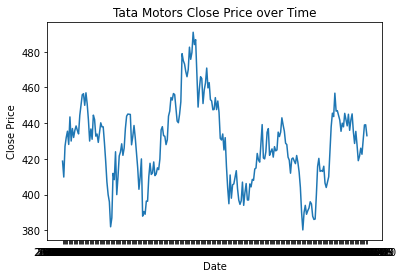

In [7]:
# Plot the Close price over time
plt.plot(data['Date'], data['Open'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Tata Motors Close Price over Time')
plt.show()

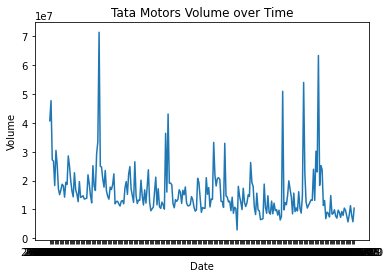

In [8]:
# Plot the Volume over time
plt.plot(data['Date'], data['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Tata Motors Volume over Time')
plt.show()

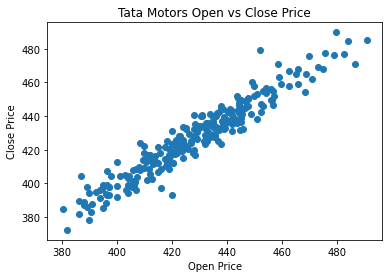

In [9]:
# Plot the correlation between the Open and Close prices
plt.scatter(data['Open'], data['Close'])
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Tata Motors Open vs Close Price')
plt.show()

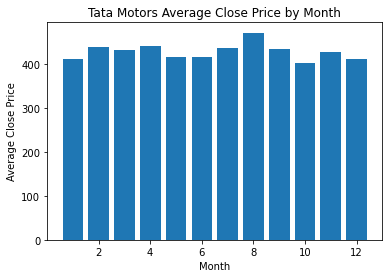

In [10]:
# Plot the average Close price by month
data['Month'] = pd.to_datetime(data['Date']).dt.month
avg_close = data.groupby('Month')['Close'].mean().reset_index()
plt.bar(avg_close['Month'], avg_close['Close'])
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.title('Tata Motors Average Close Price by Month')
plt.show()

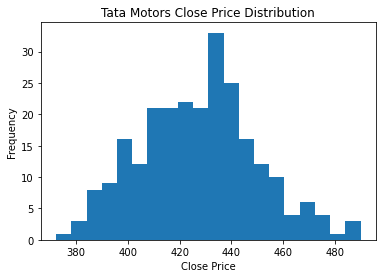

In [11]:
# Plot the distribution of the Close price
plt.hist(data['Close'], bins=20)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Tata Motors Close Price Distribution')
plt.show()

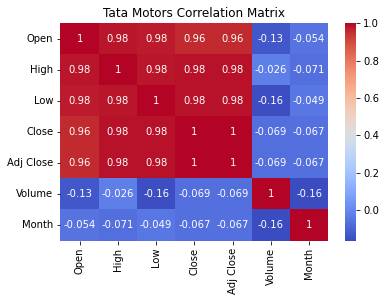

In [12]:
# Plot the correlation matrix
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Tata Motors Correlation Matrix')
plt.show()


In [13]:
# Create target variable
y = np.where(data['High'].shift(-1) > data['Low'], 1, -1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# SVM model
svm = SVC(kernel='rbf', C=10, gamma=0.1)
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred)
svm_prec = precision_score(y_test, svm_pred)
svm_rec = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
print('SVM Accuracy:', svm_acc)
print('SVM Precision:', svm_prec)
print('SVM Recall:', svm_rec)
print('SVM F1 Score:', svm_f1)

SVM Accuracy: 0.92
SVM Precision: 0.92
SVM Recall: 1.0
SVM F1 Score: 0.9583333333333334


In [15]:
# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred)
knn_rec = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
print('KNN Accuracy:', knn_acc)
print('KNN Precision:', knn_prec)
print('KNN Recall:', knn_rec)
print('KNN F1 Score:', knn_f1)

KNN Accuracy: 0.92
KNN Precision: 0.92
KNN Recall: 1.0
KNN F1 Score: 0.9583333333333334


In [16]:
# MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500)
mlp.fit(X_train_scaled, y_train)
mlp_pred = mlp.predict(X_test_scaled)
mlp_acc = accuracy_score(y_test, mlp_pred)
mlp_prec = precision_score(y_test, mlp_pred)
mlp_rec = recall_score(y_test, mlp_pred)
mlp_f1 = f1_score(y_test, mlp_pred)
print('MLP Accuracy:', mlp_acc)
print('MLP Precision:', mlp_prec)
print('MLP Recall:', mlp_rec)
print('MLP F1 Score:', mlp_f1)

MLP Accuracy: 0.92
MLP Precision: 0.92
MLP Recall: 1.0
MLP F1 Score: 0.9583333333333334


C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
